In [1]:
import json

In [2]:
f = "data/countries.geojson"
with open(f, 'r') as infile:
    g = json.load(infile)

In [3]:
g.keys()

dict_keys(['type', 'features'])

In [4]:
n_features = len(g['features'])
n_features

255

In [5]:
polygons = []
multipolygons = []
for i, feature in enumerate(g['features']):
    if feature['geometry']['type'] == 'Polygon':
        n_p = len(feature['geometry']['coordinates'])
        polygons.append((i,n_p))
    elif feature['geometry']['type'] == 'MultiPolygon':
        n_p = len(feature['geometry']['coordinates'])
        multipolygons.append((i,n_p))

In [6]:
len(polygons)

105

In [7]:
len(multipolygons)

150

In [8]:
multipolygons[:5]

[(2, 3), (3, 2), (5, 16), (7, 10), (8, 8)]

In [9]:
len(feature['geometry']['coordinates'][0])

766

In [109]:
f = "data/countries_simplified.geojson"
with open(f, 'r') as infile:
    g = json.load(infile)

In [104]:
n_features = len(g['features'])
n_features

246

In [105]:
polygons = []
multipolygons = []
for i, feature in enumerate(g['features']):
    if feature['geometry']['type'] == 'Polygon':
        n_p = len(feature['geometry']['coordinates'])
        polygons.append((i,n_p))
    elif feature['geometry']['type'] == 'MultiPolygon':
        n_p = len(feature['geometry']['coordinates'])
        multipolygons.append((i,n_p))

In [106]:
len(polygons)

0

In [107]:
len(multipolygons)

246

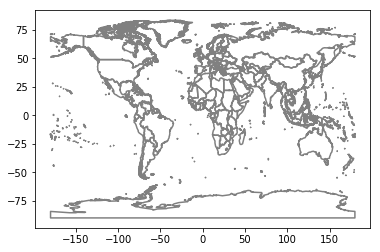

In [110]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')

In [112]:
len(g['features'])

246

In [10]:
c = feature['geometry']['coordinates']

In [11]:
feature.keys()

dict_keys(['type', 'properties', 'geometry'])

In [12]:
feature['properties']

{'ADMIN': 'Zimbabwe', 'ISO_A3': 'ZWE'}

In [13]:
feature['type']

'Feature'

In [14]:
feature['geometry']['type']

'Polygon'

In [15]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


/home/serge/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


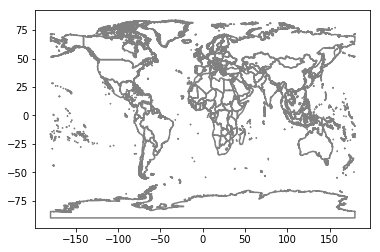

In [16]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')

In [18]:
import pandas as pd
participants2017 = pd.read_csv('data/participants2017.csv', encoding='latin-1')

In [19]:
participants2017

,name,email,lat,lon,affiliation
0,Daidai Shen,dshen3@uncc.edu,35.307093,-80.735164,University of North Carolina at Charlotte
1,Michael Reilly,mkreilly@gmail.com,41.081437,-73.818223,Columbia University
2,Kai Cao,caokaisqtv@gmail.com,1.299257,103.773763,National University of Singapore
3,Yang Yang,zoeyangyang@gmail.com,1.297510,103.770684,National University of Singapore
4,Long Wang,wanglong@u.nus.edu,1.297477,103.770483,National University of Singapore
5,Dustin Frye,dufrye@vassar.edu,41.686047,-73.897342,Vassar College
6,Cristina Ibarra Armenta,cibarra@uas.edu.mx,24.825252,-107.381750,Universidad Autãnoma de Sinaloa
7,Cristina Miller,cmiller@ers.usda.gov,38.886768,-77.030001,U.S. Department of Agriculture
8,Sudhir Thakur,thakurs@csus.edu,38.567158,-121.426703,"California State University, Sacramento"
9,Gabriel Granco,ggranco@k-state.edu,39.859249,-75.783142,Stroud Water Research Cente


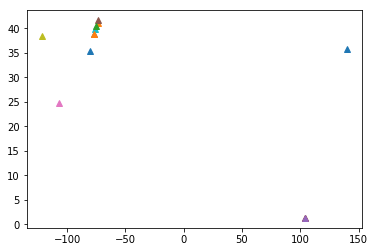

In [20]:
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^')

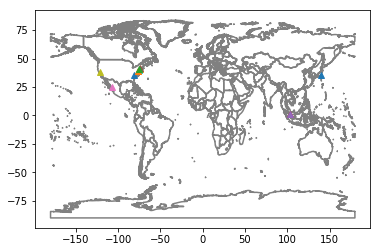

In [21]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^')     
    

In [22]:
vancouver = (-123.120542, 49.285095)

In [23]:
import pyproj

In [24]:
pyproj.Geod?

Init signature: pyproj.Geod(initstring=None, **kwargs)
Docstring:     
performs forward and inverse geodetic, or Great Circle,
computations.  The forward computation (using the 'fwd' method)
involves determining latitude, longitude and back azimuth of a
computations.  The forward computation (using the 'fwd' method)
involves determining latitude, longitude and back azimuth of a
terminus point given the latitude and longitude of an initial
point, plus azimuth and distance. The inverse computation (using
the 'inv' method) involves determining the forward and back
azimuths and distance given the latitudes and longitudes of an
initial and terminus point.
File:           ~/anaconda3/lib/python3.6/site-packages/pyproj/__init__.py
Type:           type


In [25]:
geod = pyproj.Geod(ellps='WGS84')

In [26]:
gcd = geod.inv(vancouver[0], vancouver[1], 27.9977, -26.1836)
gcd

(54.303648919266344, -36.23307084304412, 16441913.15341734)

In [27]:
gcd[-1] * 0.000621371

10216.528018052086

In [28]:
waypoints = geod.npts(vancouver[0], vancouver[1], 27.9977, -26.1836, 20)

In [29]:
waypoints

[(-113.62449174255278, 53.02493537702134),
 (-102.5695610234907, 55.87362127378938),
 (-90.14535416287953, 57.59350558972551),
 (-76.9803257244773, 58.00117978092088),
 (-64.0123793314896, 57.04772521256818),
 (-52.09200843052379, 54.844116395375),
 (-41.6665395813382, 51.60600629966616),
 (-32.77861902929462, 47.57129344061538),
 (-25.242219444522405, 42.94703787381407),
 (-18.80050580674427, 37.893645841843515),
 (-13.20752462344089, 32.52923061774788),
 (-8.255407119322044, 26.939737195635505),
 (-3.7761137329229655, 21.188487855535143),
 (0.3655554864024424, 15.323528073554593),
 (4.2805939918934826, 9.382908746242506),
 (8.06374137700007, 3.398457242295385),
 (11.800362725888021, -2.6014271128202813),
 (15.572539861647556, -8.589518773040517),
 (19.46486245718387, -14.537696867856837),
 (23.5704494464689, -20.414734884675603)]

In [30]:
#route = [minn]
route = [vancouver]
route.extend(waypoints)
route.append((27.9977, -26.1836))

In [31]:
route = np.array(route)

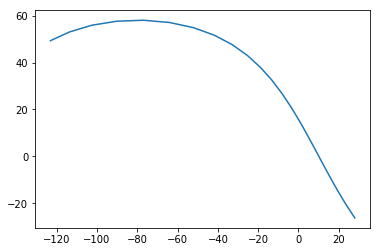

In [32]:
plot(route[:,0], route[:,1])

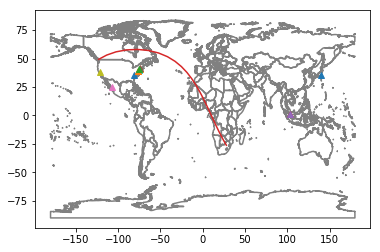

In [33]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^')     

plot(route[:,0], route[:,1])

## On your own

1. Calculate and plot the great circle routes bringing our participants to the workshop.

# Solution

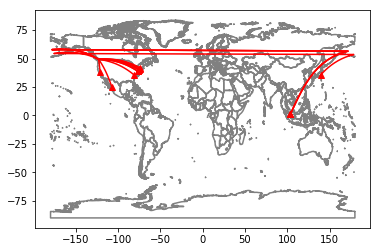

In [88]:
import pandas as pd
participants2017 = pd.read_csv('data/participants2017.csv', encoding='latin-1')
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     


for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plot(route[:,0], route[:,1], color='r')

### Break the line

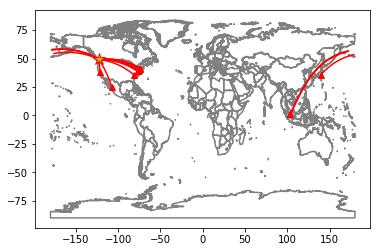

In [89]:
import pandas as pd
participants2017 = pd.read_csv('data/participants2017.csv',encoding='latin-1')
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     

for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        plot(route[:min_index,0], route[:min_index,1], color='r')
        plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    plot(route[:,0], route[:,1], color='r')
plot(vancouver[0],vancouver[1],  '*', markerfacecolor='y', markeredgecolor='r', markersize=12)

### Plot the great circle routes bringing our participants to the workshop in 2016

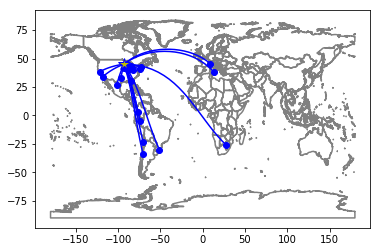

In [90]:
import pandas as pd
participants2016 = pd.read_csv('data/participants2016.csv',encoding='latin-1')
minn = (-93.2550, 44.9778)
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2016.iterrows():
    plot(p['lon'], p['lat'], 'o', markerfacecolor='b', markeredgecolor='b')     


for idx, p in participants2016.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plot(route[:,0], route[:,1], color='b')
plot(minn[0],minn[1],  '*', markerfacecolor='y', markeredgecolor='b', markersize=12)

### Plot the great circle routes bringing our participants to the workshop in 2016(blue) & 2017(red)

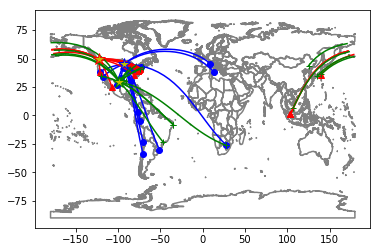

In [91]:
import pandas as pd
participants2018 = pd.read_csv('data/participants2018.csv',encoding='latin-1')
participants2017 = pd.read_csv('data/participants2017.csv',encoding='latin-1')
participants2016 = pd.read_csv('data/participants2016.csv',encoding='latin-1')
vancouver = (-123.120542, 49.285095)
minn = (-93.2550, 44.9778)
sanantonio = -98.4936, 29.4241
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2016.iterrows():
    plot(p['lon'], p['lat'], 'o', markerfacecolor='b', markeredgecolor='b')     
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     
for idx, p in participants2018.iterrows():
    plot(p['lon'], p['lat'], '+', markerfacecolor='g', markeredgecolor='g')     


for idx, p in participants2016.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plot(route[:,0], route[:,1], color='b')

for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        plot(route[:min_index,0], route[:min_index,1], color='r')
        plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    plot(route[:,0], route[:,1], color='r')
    
    
for idx, p in participants2018.iterrows():
    waypoints = geod.npts(sanantonio[0], sanantonio[1], p['lon'], p['lat'], 20)
    route = [sanantonio]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        plot(route[:min_index,0], route[:min_index,1], color='g')
        plot(route[min_index:,0], route[min_index:,1], color='g')
        continue
    plot(route[:,0], route[:,1], color='g')
plot(vancouver[0],vancouver[1],  '*', markerfacecolor='y', markeredgecolor='r', markersize=12)
plot(minn[0],minn[1],  '*', markerfacecolor='y', markeredgecolor='b', markersize=12)
plot(sanantonio[0],sanantonio[1],  '*', markerfacecolor='y', markeredgecolor='g', markersize=12)

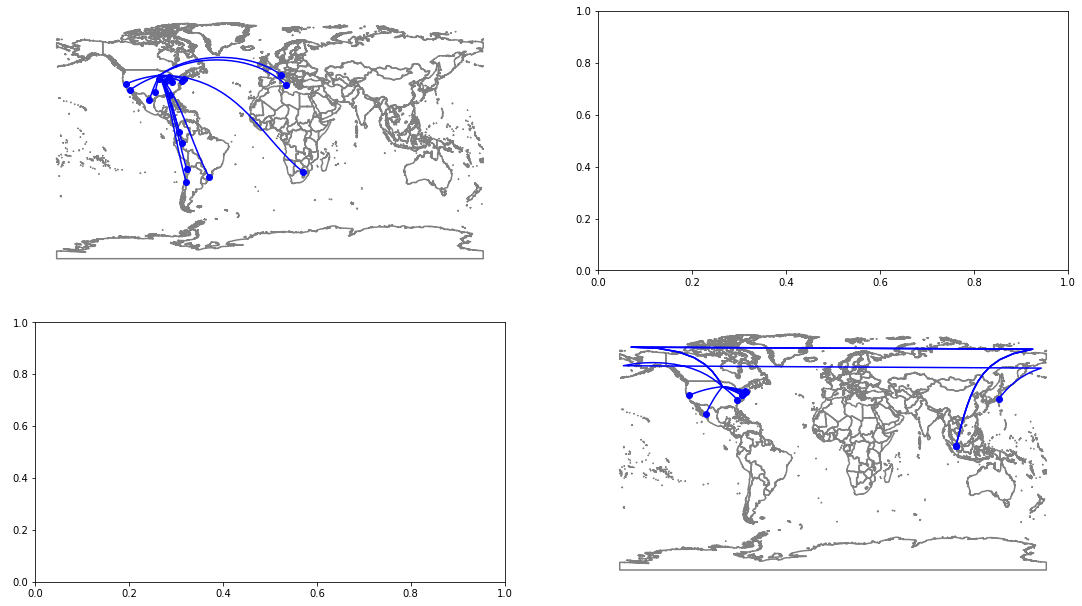

In [102]:
fig, axes = plt.subplots(2, 2)
#axes[0, 0].plot(x, y)
#axes[1, 1].scatter(x, y)
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            axes[0,0].plot(*geom.exterior.xy, color='grey')
    else:
        axes[0,0].plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2016.iterrows():
    axes[0,0].plot(p['lon'], p['lat'], 'o', markerfacecolor='b', markeredgecolor='b')     
    
for idx, p in participants2016.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    axes[0,0].plot(route[:,0], route[:,1], color='b')

axes[0,0].axis('off')

for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            axes[1,1].plot(*geom.exterior.xy, color='grey')
    else:
        axes[1,1].plot(*sf.exterior.xy, color='grey')

for idx, p in participants2017.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    axes[1,1].plot(route[:,0], route[:,1], color='b')   
    
for idx, p in participants2017.iterrows():
    axes[1,1].plot(p['lon'], p['lat'], 'o', markerfacecolor='b', markeredgecolor='b')     
axes[1,1].axis('off')
    
fig.set_size_inches(18.5, 10.5, forward=True)

2016
2017
2018


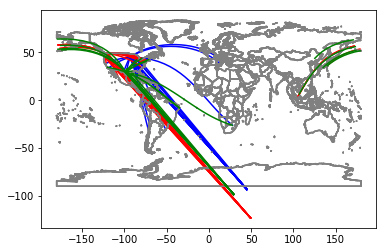

In [85]:
import pandas as pd
colors = 'b','r','g'
years = [2016, 2017, 2018]
file_names = ["data/participants{year}.csv".format(year=year) for year in years]
participants = [pd.read_csv(file_name, encoding='latin-1') for file_name in file_names]
sites = (44.9778, -93.2650), (49.2827,-123.1207),(29.4241, -98.4936)
data = zip(years,colors,participants, sites)

data = zip(years,colors,participants, sites)
from shapely.geometry import shape


for year, color, participants, site in data:
    print(year)
    for feature in g['features']:
        sf = shape(feature['geometry'])
        if feature['geometry']['type'] == 'MultiPolygon':
            for geom in sf.geoms:
                plot(*geom.exterior.xy, color='grey')
        else:
            plot(*sf.exterior.xy, color='grey')
    for idx, p in participants.iterrows():
        waypoints = geod.npts(site[1], site[0], p['lon'], p['lat'], 20)
        route = [site]
        route.extend(waypoints)
        route.append((p['lon'], p['lat']))
        route = np.array(route)
        if (route[:,0].max()-route[:,0].min())>180:
            min_index = route[:,0].argmin()+1
            plot(route[:min_index,0], route[:min_index,1], color=color)
            plot(route[min_index:,0], route[min_index:,1], color=color)
            continue
        plot(route[:,0], route[:,1], color=color)
    

2016
2017
2018


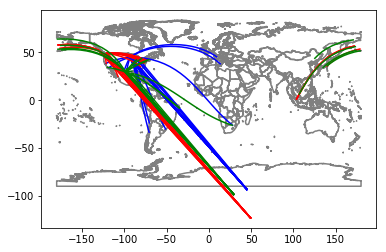

In [82]:
data = zip(years,colors,participants, sites)
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')

for year, color, participants, site in data:
    print(year)
    for idx, p in participants.iterrows():
        waypoints = geod.npts(site[1], site[0], p['lon'], p['lat'], 20)
        route = [site]
        route.extend(waypoints)
        route.append((p['lon'], p['lat']))
        route = np.array(route)
        if (route[:,0].max()-route[:,0].min())>180:
            min_index = route[:,0].argmin()+1
            plot(route[:min_index,0], route[:min_index,1], color=color)
            plot(route[min_index:,0], route[min_index:,1], color=color)
            continue
        plot(route[:,0], route[:,1], color=color)

In [73]:
site

(29.4241, -98.4936)

In [45]:
values

,name,email,lat,lon,affiliation
0,Alain Pholo Bala,apholo@uj.ac.za,-26.2614,27.92260,University of Johannesburg
1,Annie Lee,annieslee777@gmail.com,40.5008,-74.44740,Rutgers University
2,Yan Cen,cenyan0304@live.cn,43.8171,125.32350,Northeast Normal University
3,Brian Asquith,basquith86@gmail.com,42.2900,-85.59810,W.E. Upjohn Institute
4,Raul Silveira Neto,rau.silveira@uol.com.br,-8.0441,-34.88610,Federal University of Pernambuco
5,Alin Halimatussadiah,alin.halimah@gmail.com,6.3628,106.82700,University of Indonesia
6,Zhangliang Chen,zchen105@gmail.com,42.3770,-71.11670,Harvard Kennedy School
7,AndrÃ© Chagas,achagas@usp.br,-23.5447,-46.62529,University of Sao Paulo
8,Mitsuru Ota,ota@sk.tsukuba.ac.jp,36.1088,140.10370,University of Tsukuba
9,Vikash Dangal,vdangal@agcenter.lsu.edu,30.4133,-91.18000,Louisiana State University


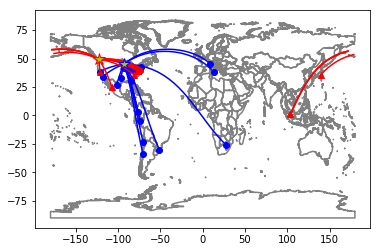

In [37]:
for     
    
    
for idx, p in participants2016.iterrows():
    plot(p['lon'], p['lat'], 'o', markerfacecolor='b', markeredgecolor='b')     
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     


for idx, p in participants2016.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plot(route[:,0], route[:,1], color='b')

for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        plot(route[:min_index,0], route[:min_index,1], color='r')
        plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    plot(route[:,0], route[:,1], color='r')
plot(vancouver[0],vancouver[1],  '*', markerfacecolor='y', markeredgecolor='r', markersize=12)
plot(minn[0],minn[1],  '*', markerfacecolor='y', markeredgecolor='b', markersize=12)

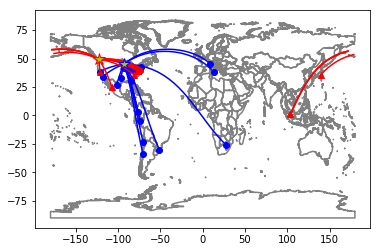

In [37]:
import pandas as pd
participants2017 = pd.read_csv('data/participants2017.csv',encoding='latin-1')
participants2017 = pd.read_csv('data/participants2017.csv',encoding='latin-1')
participants2016 = pd.read_csv('data/participants2016.csv',encoding='latin-1')
vancouver = (-123.120542, 49.285095)
minn = (-93.2550, 44.9778)
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2016.iterrows():
    plot(p['lon'], p['lat'], 'o', markerfacecolor='b', markeredgecolor='b')     
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     


for idx, p in participants2016.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plot(route[:,0], route[:,1], color='b')

for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        plot(route[:min_index,0], route[:min_index,1], color='r')
        plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    plot(route[:,0], route[:,1], color='r')
plot(vancouver[0],vancouver[1],  '*', markerfacecolor='y', markeredgecolor='r', markersize=12)
plot(minn[0],minn[1],  '*', markerfacecolor='y', markeredgecolor='b', markersize=12)